In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns
import cmcrameri.cm as cmc

import astropy.constants as cst

In [2]:
filename = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/grid.h5"
tracks = pd.read_hdf(filename, "tracks")
tracks.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell
track                                                              
7000     0.92329  0.279311  0.001829  1.608258  0.000000   0.006041
7001     1.72329  0.229311  0.010871  2.308258  0.012396   0.006041
7002     2.12329  0.304311  0.004172  2.658258  0.015861   0.006041
7003     1.32329  0.254311  0.024469  1.958258  0.002481   0.006041
7004     1.12329  0.291811  0.006519  2.133258  0.000000   0.006041

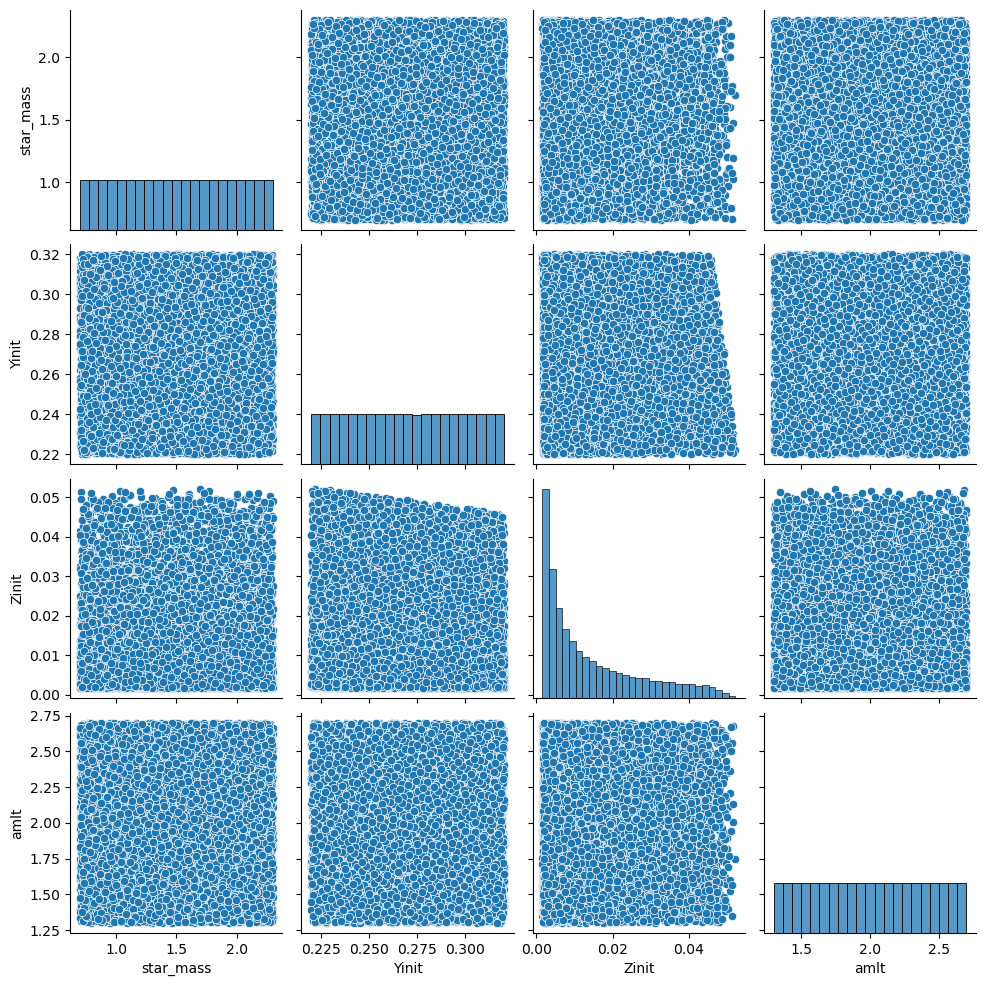

In [3]:
vars = ["star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(tracks, vars=vars);

In [4]:
stars = pd.read_hdf(filename, "stars")
stars.head()

star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  delta_Pg  
track star                                            
7000  1     0.078416  148.565794  1.129515       0.0  
      2     0.077135  149.148739  1.131800       0.0  
      3     0.075916  149.362908  1.132830       0.0  
      4     0.075178  148.552167  1.130613       0.0  
      5     0.075810  148.331713  1.129892       0.0

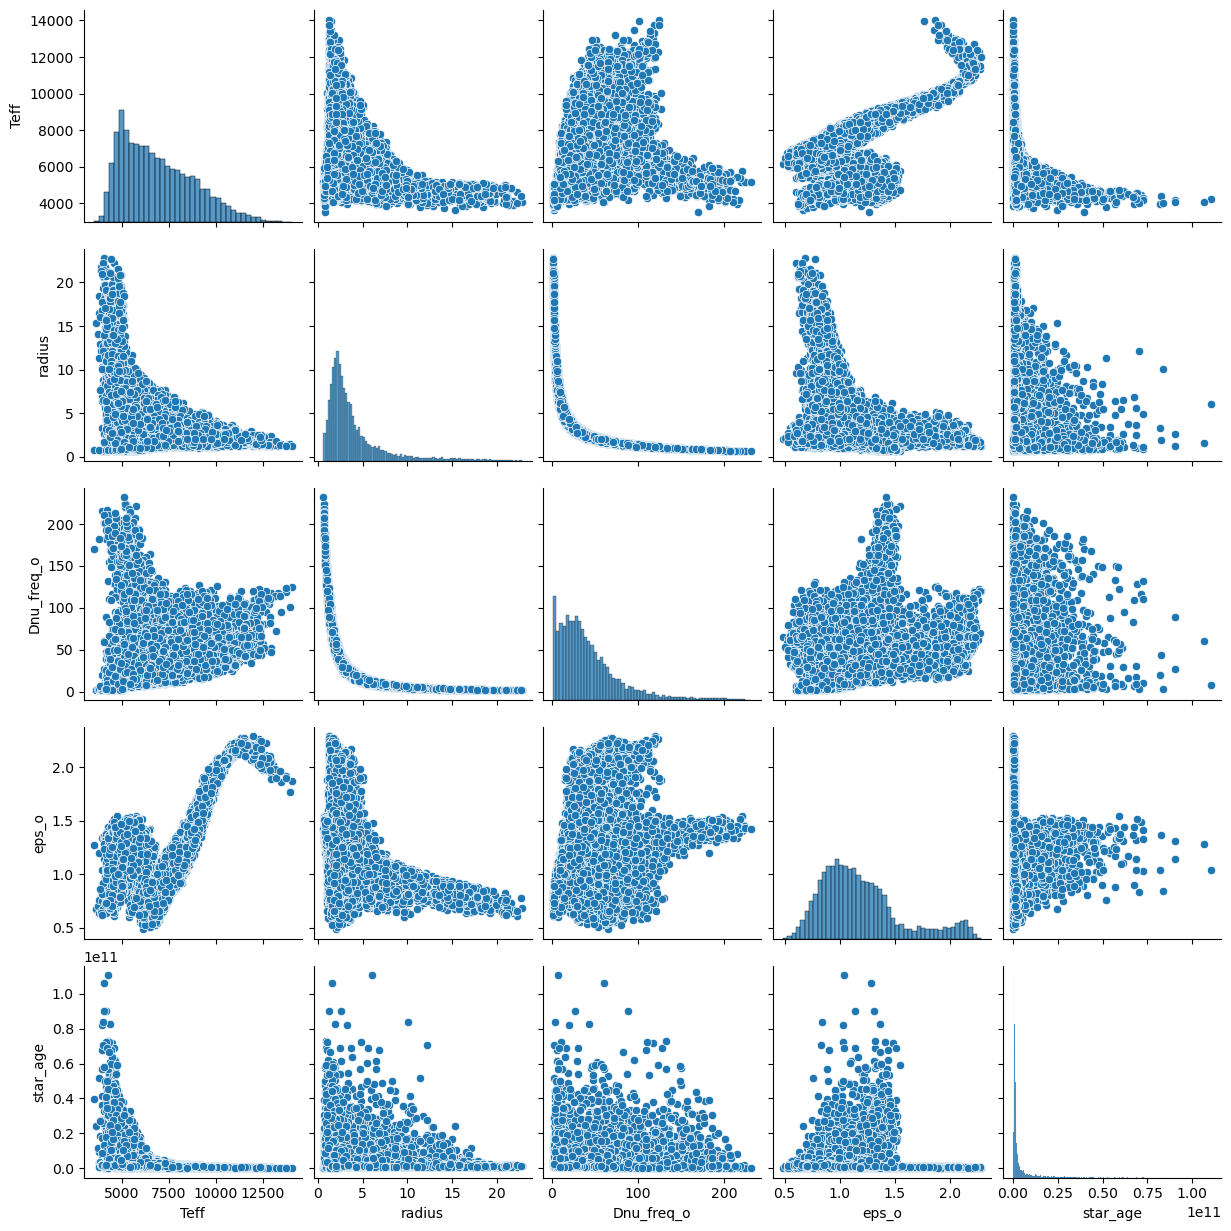

In [5]:
num_samples = 10000
vars = ["Teff", "radius", "Dnu_freq_o", "eps_o", "star_age"]
sns.pairplot(stars.sample(num_samples), vars=vars);

In [6]:
# mask = (stars.star_age < 2e10)
# grid = tracks.join(stars.loc[mask]).reset_index()
grid = tracks.join(stars).reset_index()
grid.head()

track  star  star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
0   7000     1    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
1   7000     2    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
2   7000     3    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
3   7000     4    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
4   7000     5    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

       star_age    radius         Teff  center_h1    log_LHe  log_Lnuc  \
0  2.220454e+07  0.893151  6382.509287   0.718192 -45.291905  0.078416   
1  2.300916e+07  0.891027  6377.312552   0.718122 -45.308912  0.077135   
2  2.397470e+07  0.890320  6373.785487   0.718037 -45.328570  0.075916   
3  3.019433e+07  0.893682  6371.412400   0.717474 -45.392646  0.075178   
4  3.259691e+07  0.894573  6371.453759   0.717253 -45.402736  0.075810   

   Dnu_freq_o     eps_o  delta_Pg  
0  148.565794  1.129515       0.0  
1  149.148739  1.131800       0.0  
2  149.362908  1.132830       0.0  
3  148.552167  1.130613       0.0  
4  148.331713  1.129892       0.0

In [18]:
grid["luminosity"] = grid.radius**2 * (grid.Teff/const.Tsun)**4
grid["log_L"] = np.log10(grid.luminosity)
grid["log_Zinit"] = np.log10(grid.Zinit)
grid["log_age"] = np.log10(grid.star_age)
grid["log_g"] = np.log10(
    cst.G.cgs * cst.M_sun.cgs * grid.star_mass / cst.R_sun.cgs**2 / grid.radius**2
)
grid["log_R"] = np.log10(grid.radius)
grid["log_Teff"] = np.log10(grid.Teff)
grid["log_Dnu"] = np.log10(grid.Dnu_freq_o)

In [19]:
grid["f_nuc"] = 10**(grid.log_Lnuc - grid.log_L)
grid["log_f_He"] = (grid.log_LHe - grid.log_L)

In [22]:
grid["Xinit"] = 1 - grid.Yinit - grid.Zinit
grid["delta_X"] = grid.Xinit - grid.center_h1

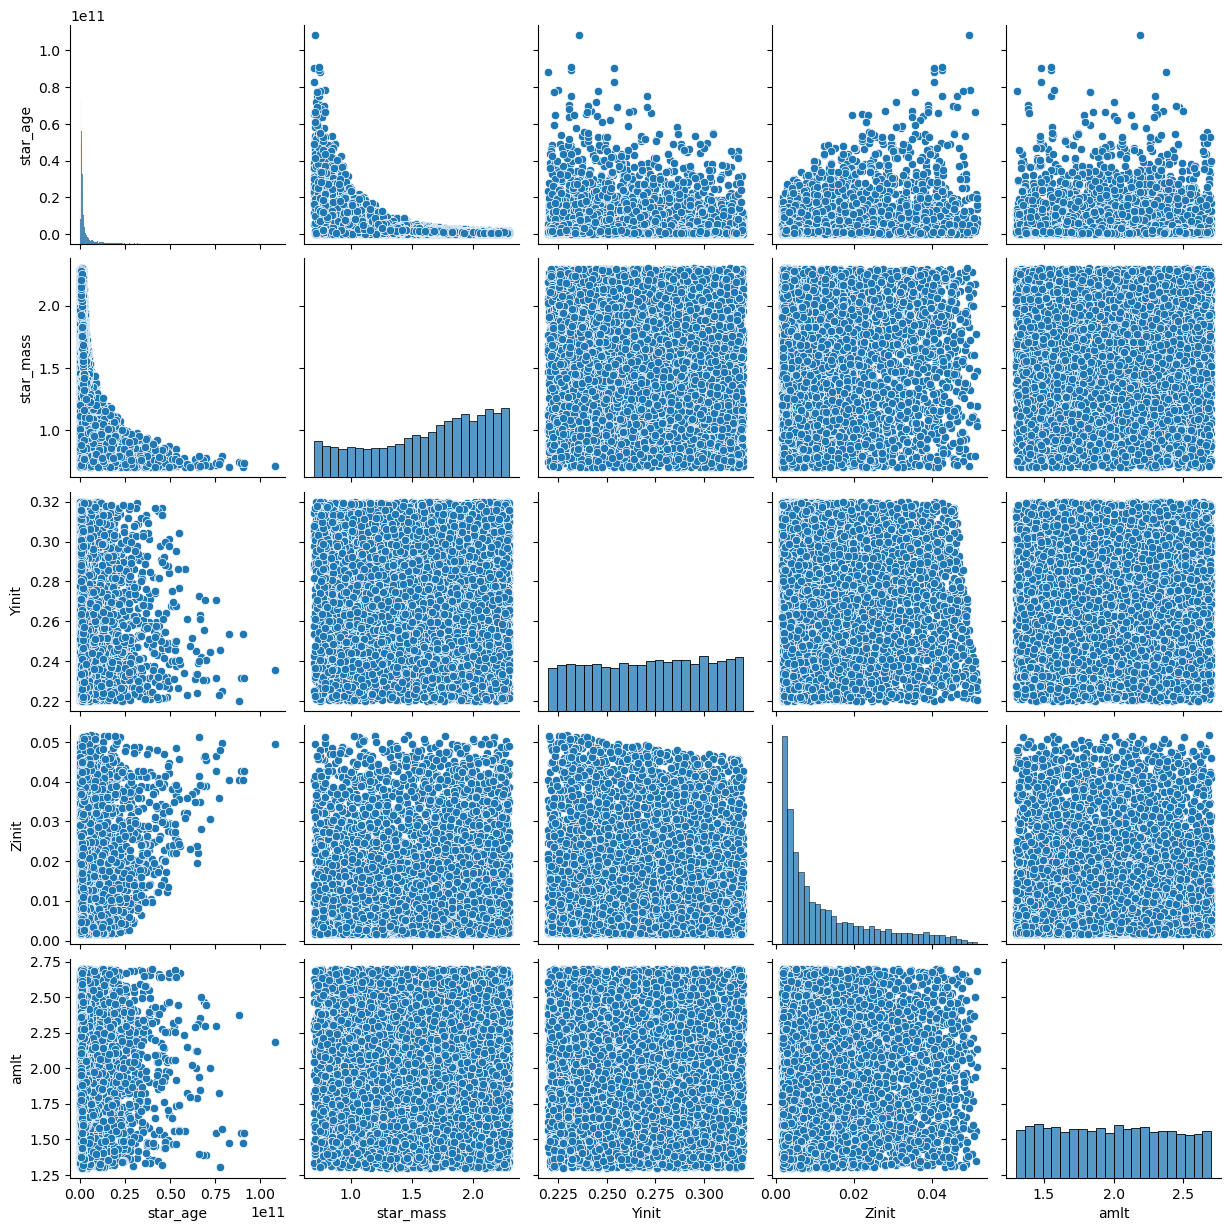

In [9]:
num_samples = 10000
vars = ["star_age", "star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

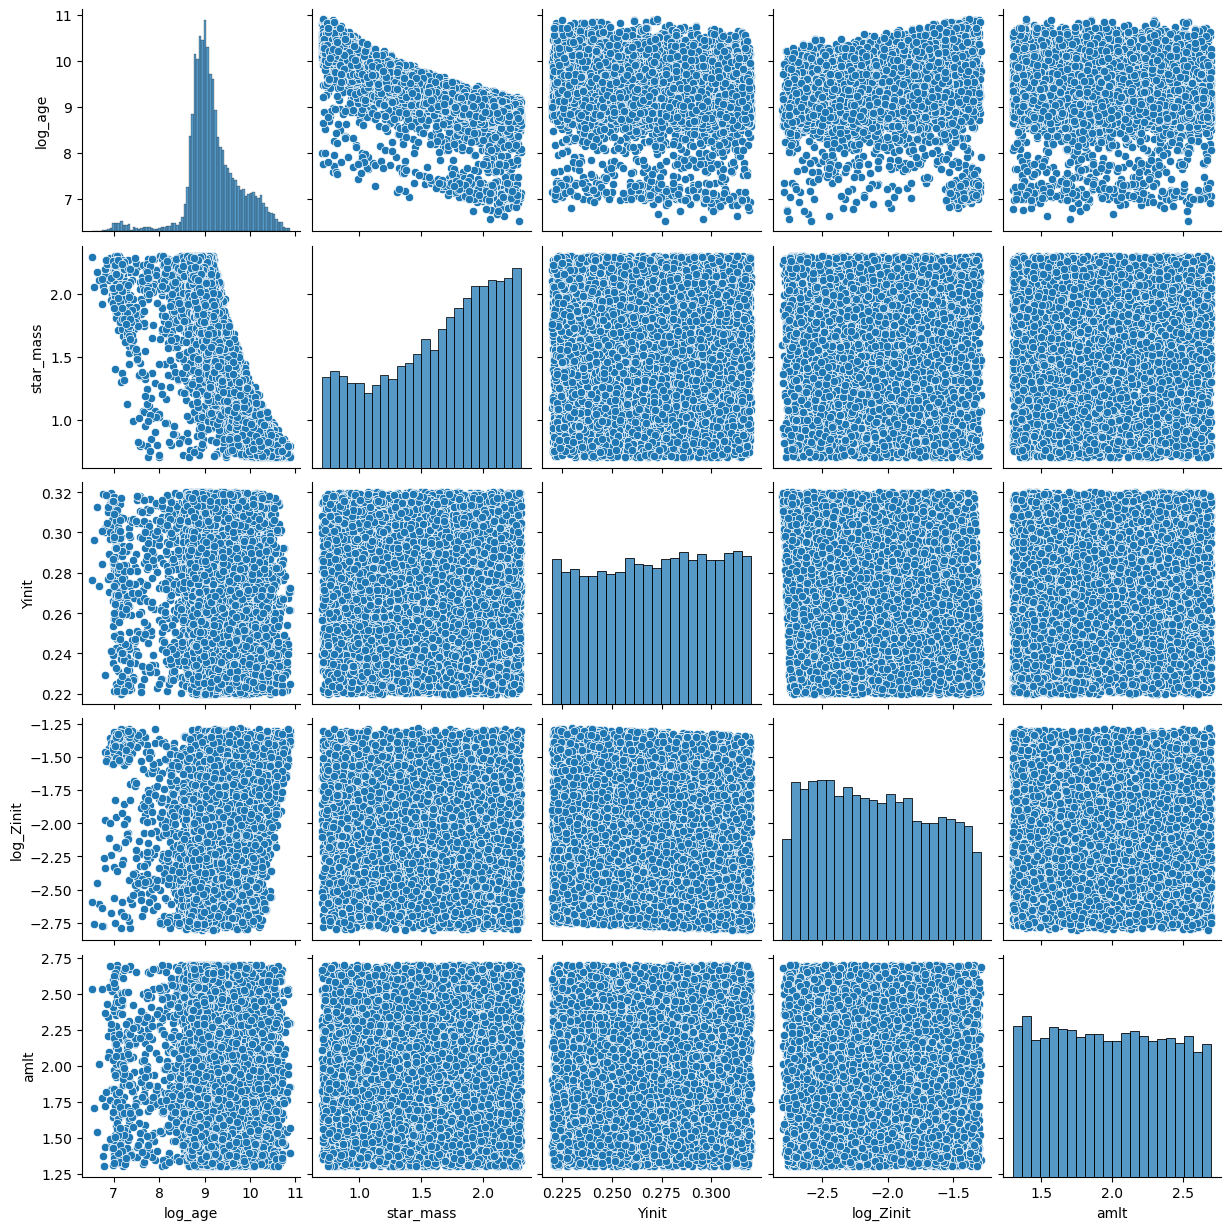

In [10]:
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

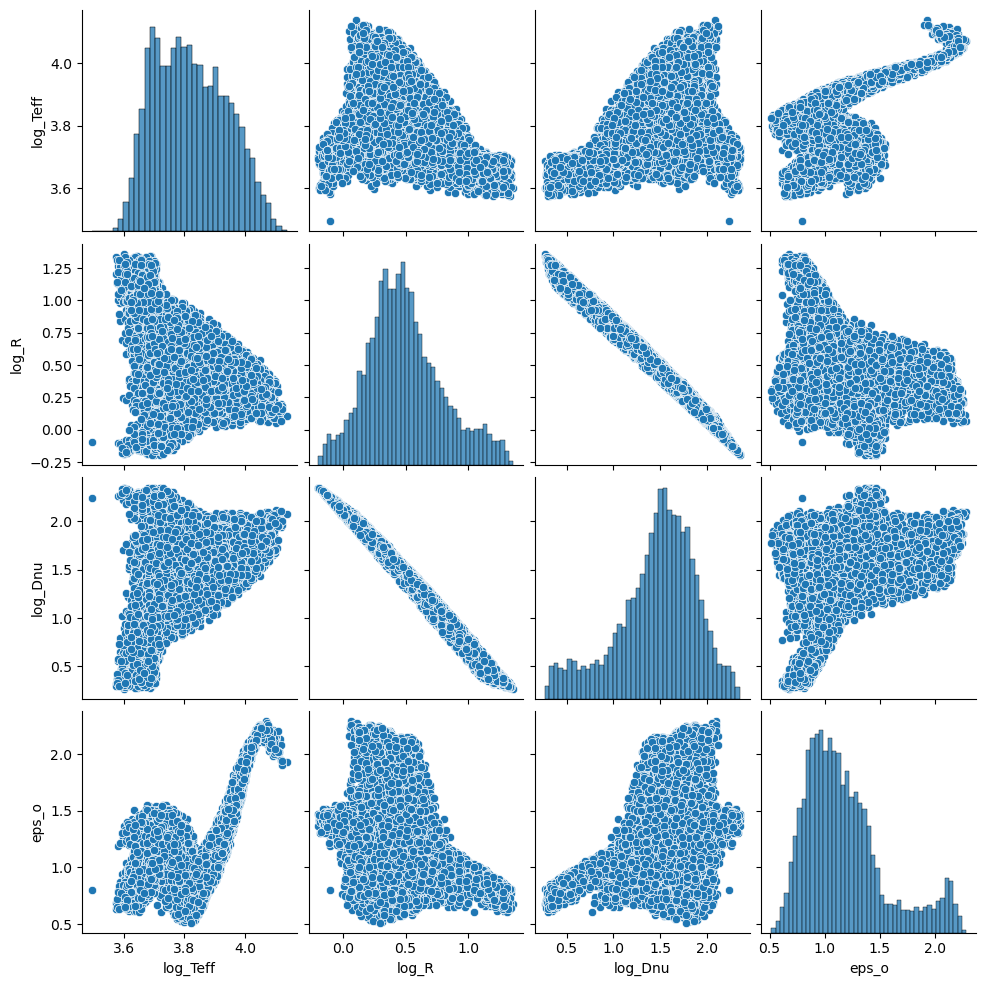

In [11]:
vars = ["log_Teff", "log_R", "log_Dnu", "eps_o"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [12]:
grid["f_nuc"] = 10**(grid.log_Lnuc - grid.log_L)
grid["log_f_He"] = (grid.log_LHe - grid.log_L)

## EEP

It may be good to calculate EEP during grid cleaning.

1. ZAMS -- both center_h1 < (Xinit - 0.0015) AND Lnuc/L > 0.999
2. IAMS -- center_h1 < 0.3
3. TAMS -- center_h1 < 1e-12
4. END -- Dnu_s < 2 uHz (first time this happens)

In [13]:
grid.columns

Index(['track', 'star', 'star_mass', 'Yinit', 'Zinit', 'amlt', 'fov_core',
       'fov_shell', 'star_age', 'radius', 'Teff', 'center_h1', 'log_LHe',
       'log_Lnuc', 'Dnu_freq_o', 'eps_o', 'luminosity', 'log_L', 'log_Zinit',
       'log_age', 'log_g', 'log_R', 'log_Teff', 'log_Dnu', 'f_nuc',
       'log_f_He'],
      dtype='object')

numax scales as $g \, T_\mathrm{eff}^{-1/2}$

In [14]:
solar_g = cst.G.cgs.value * const.msun / const.rsun**2

In [15]:
solar_numax = 3100.
grid["log_numax"] = grid.log_g - np.log10(solar_g) \
    - 0.5 * (grid.log_Teff - np.log10(const.Tsun)) \
    + np.log10(solar_numax)
grid["numax"] = 10**grid.log_numax

In [16]:
grid["numax"].min()

15.042149809973742

In [17]:
grid["density"] = grid.star_mass / grid.radius**3

In [23]:
grid["Xinit"] = 1 - grid.Yinit - grid.Zinit
grid["delta_X"] = grid.Xinit - grid.center_h1

In [137]:
grid["phase"] = -1
grid["EEP"] = np.nan
eep_keys = ["log_Teff", "log_R"]
# weights = np.array([0.2, 0.2, 0.6])
weights = np.ones(len(eep_keys))
alpha = 0.5


for _, group in grid.groupby("track"):

    zams = ((group["f_nuc"] > 0.999) & (group["delta_X"] > 0.0015)).idxmax()
#     zams = group.where(((group["f_nuc"] > 0.999) & (group["delta_X"] > 0.0015))).first_valid_index()
#     zams = group.index[0] if zams is None else zams
    
    iams = (group.center_h1 < 0.3).idxmax()
    iams = group.index[-1] if iams == group.index[0] else iams
#     iams = group.where(group.center_h1 < 0.3).first_valid_index()
#     iams = group.index[-1] if iams is None else iams  # If None then last index
    
    tams = (group.center_h1 < 1e-12).idxmax()
    tams = group.index[-1] if tams == group.index[0] else tams
#     tams = group.where(group.center_h1 < 1e-12).first_valid_index()
#     tams = group.index[-1] if tams is None else tams

    end = (group.log_g < 2.2).idxmax()
    end = group.index[-1] if end == group.index[0] else end
#     end = group.where(group.log_g < 2.2).first_valid_index()
#     end = group.index[-1] if end is None else end

    # Max nuclear burning
    maxn = group.loc[(group.index > tams) & (group.index <= end), "f_nuc"].idxmax()

    bounds = [zams, iams, tams, maxn, end]

    di = ((weights*group[eep_keys].diff()**2).sum(axis=1)**alpha).cumsum()
    phase = [
        group.index[(group.index >= zams) & (group.index < iams)],
        group.index[(group.index >= iams) & (group.index < tams)],
#         group.index[(group.index >= tams) & (group.index < end)]
        group.index[(group.index >= tams) & (group.index < maxn)],
        group.index[(group.index >= maxn) & (group.index < end)],
    ]
    
    for i, phi in enumerate(phase):
        grid.loc[phi, "phase"] = i
        grid.loc[phi, "EEP"] = i + (di[phi] - di[bounds[i]]) / (di[bounds[i+1]] - di[bounds[i]])

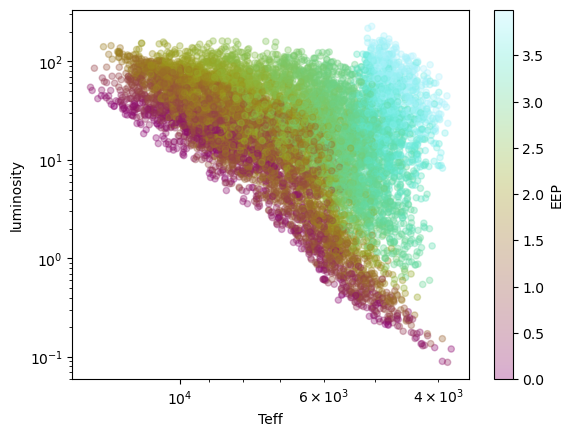

In [138]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="EEP", cmap=cmc.hawaii, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

In [78]:
# ts = grid.loc[grid.star_mass > 1.5, "track"].sample(20)
ts = grid.track.sample(50)
mask = grid.track.isin(ts) & (grid.phase > -1)

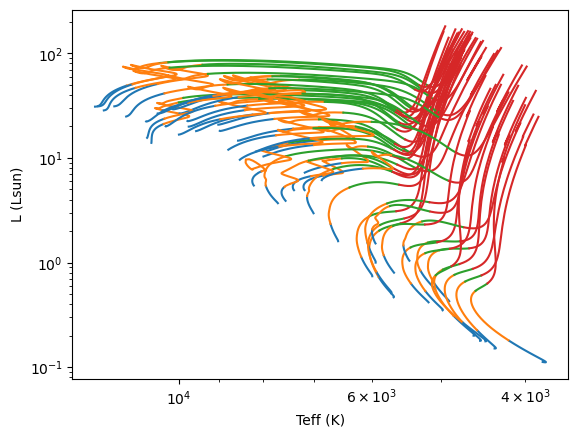

In [105]:
fig, ax = plt.subplots()

for idx, group in grid.loc[mask].groupby(["track", "phase"], sort=False):
    label = None
    c = "gray" if idx[1] == -1 else f"C{idx[1]}"
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)
#     ax.text(group.Teff.iloc[0], group.luminosity.iloc[0], idx[0])

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

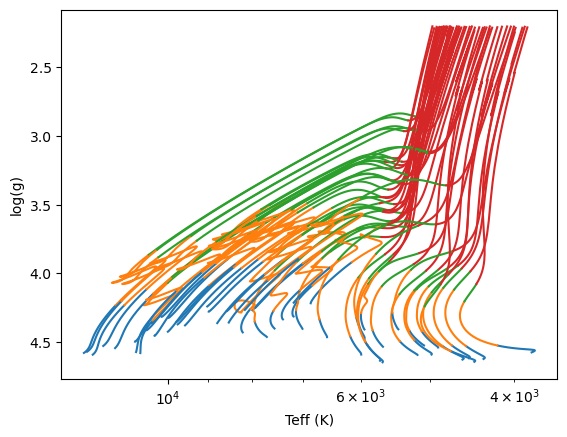

In [145]:
fig, ax = plt.subplots()

for idx, group in grid.loc[mask].groupby(["track", "phase"], sort=False):
    label = None
    c = "gray" if idx[1] == -1 else f"C{idx[1]}"
    ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)
#     ax.text(group.Teff.iloc[0], group.luminosity.iloc[0], idx[0])

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("log(g)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

What is wrong with track 5860?

<IPython.core.display.Javascript object>


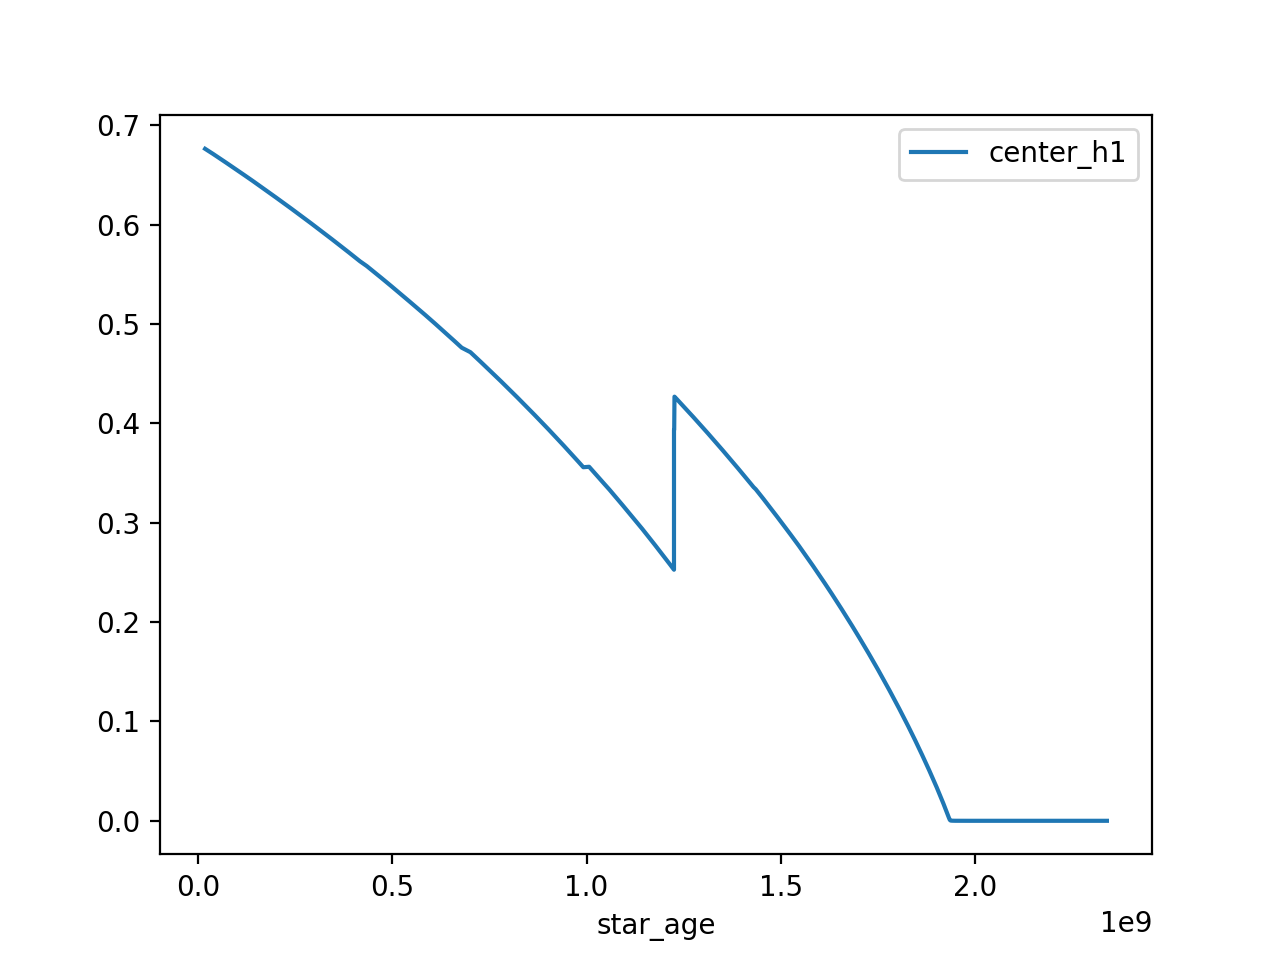

<Axes: xlabel='star_age'>

In [99]:
grid.loc[grid.track == 5860].plot(x="star_age", y="center_h1")

<IPython.core.display.Javascript object>


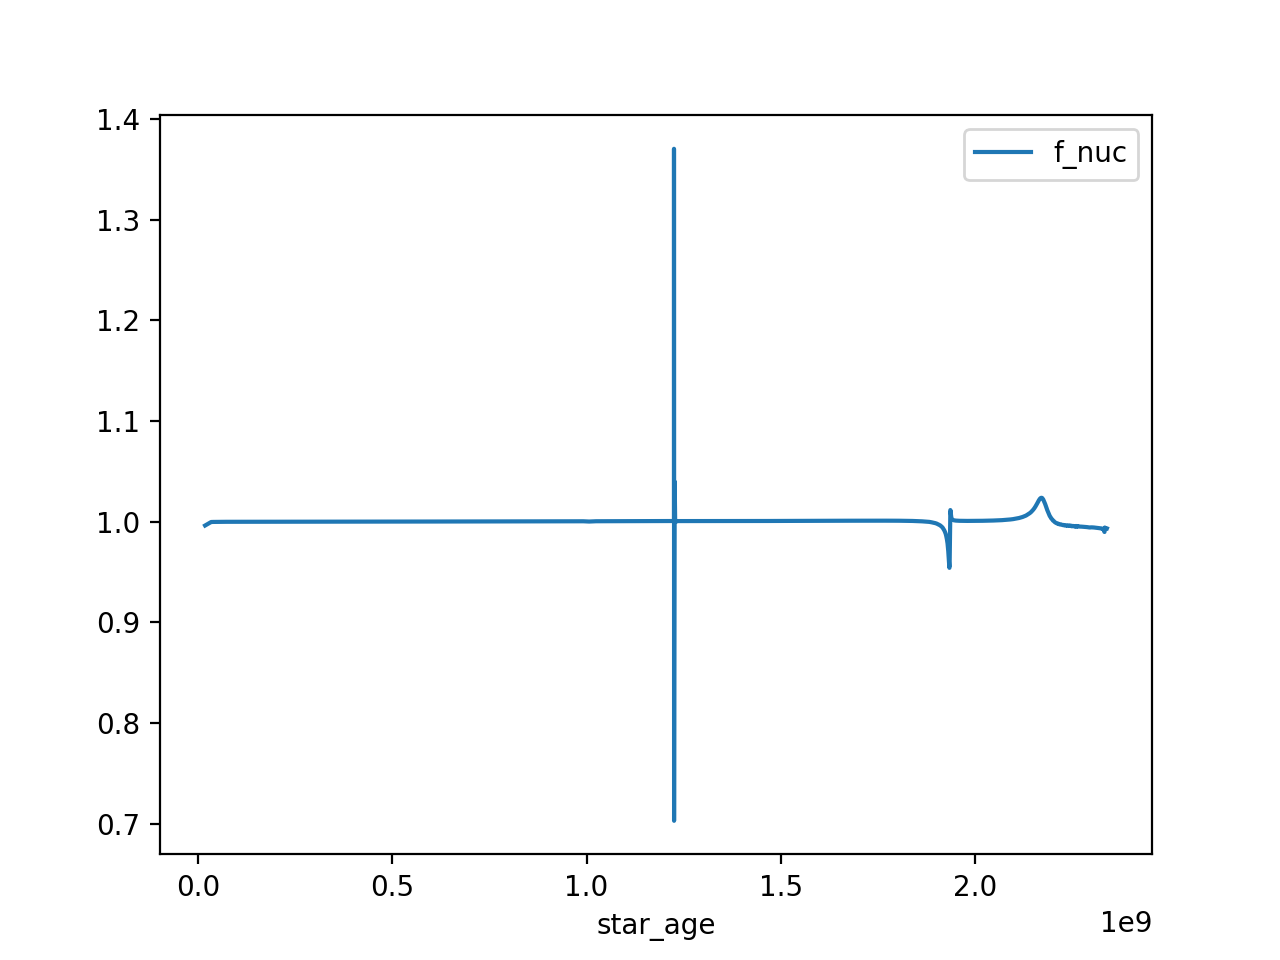

<Axes: xlabel='star_age'>

In [100]:
grid.loc[grid.track == 5860].plot(x="star_age", y="f_nuc")

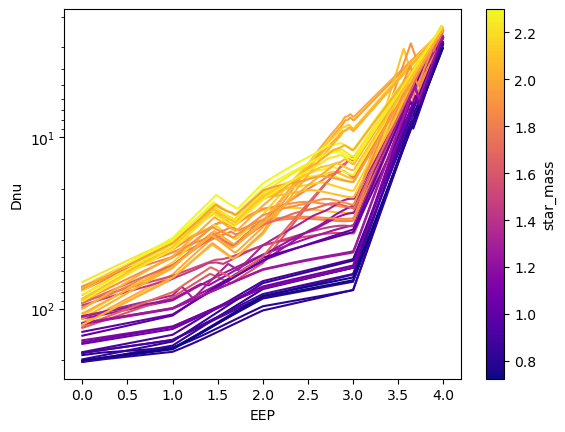

In [139]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["Dnu_freq_o"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xlabel("EEP")
ax.set_ylabel("Dnu")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

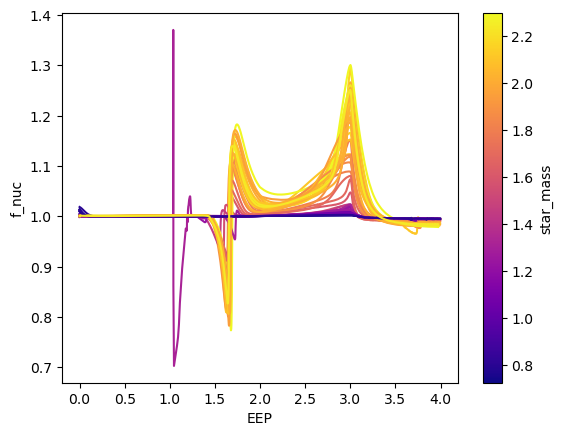

In [140]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["f_nuc"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

# ax.set_yscale("log")
ax.set_xlabel("EEP")
ax.set_ylabel("f_nuc")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

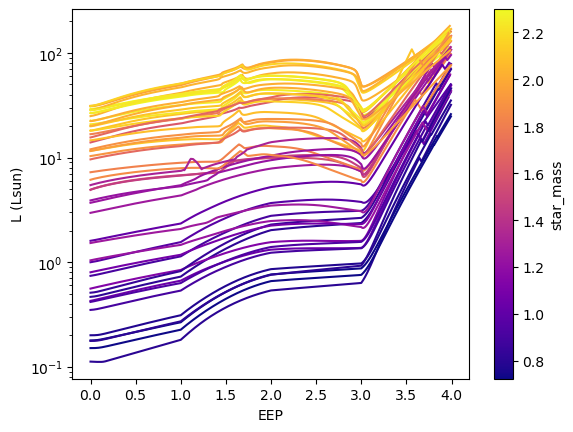

In [141]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["luminosity"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.set_yscale("log")
ax.set_xlabel("EEP")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

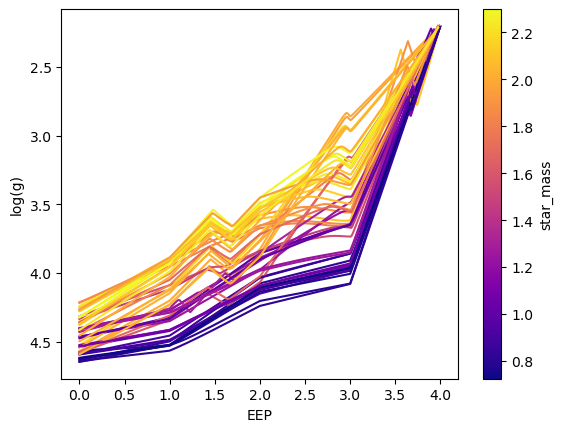

In [142]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["log_g"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.invert_yaxis()
ax.set_xlabel("EEP")
ax.set_ylabel("log(g)")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

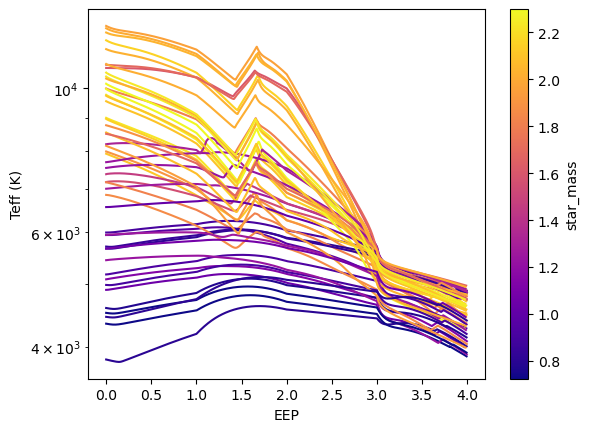

In [143]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["Teff"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.set_yscale("log")
ax.set_xlabel("EEP")
ax.set_ylabel("Teff (K)")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

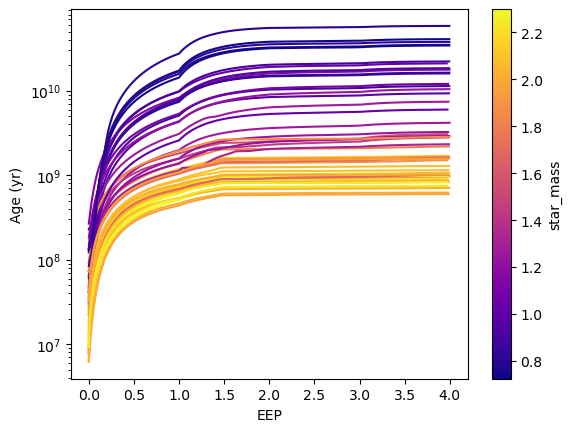

In [144]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    ax.plot(group["EEP"], group["star_age"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.set_yscale("log")
ax.set_xlabel("EEP")
ax.set_ylabel("Age (yr)")
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

In [31]:
grid.star

0            1
1            2
2            3
3            4
4            5
          ... 
6587248    495
6587249    496
6587250    497
6587251    498
6587252    499
Name: star, Length: 6587253, dtype: int64

In [33]:
pd.Series(-1, grid.index, name="phase")

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
6587248   -1
6587249   -1
6587250   -1
6587251   -1
6587252   -1
Name: phase, Length: 6587253, dtype: int64